In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.patches as mpatches
import pingouin as pg

In [3]:
# Supongamos que `datos` es un DataFrame de pandas
ruta = 'databases/database_ejem.xlsx'
datos = pd.read_excel(ruta, sheet_name='ACP y AF', header=0)
datos.head()

,Area,Lago,NO2,NO3,NH4,PO4,SiO2,Carbono,Profundidad,pH,Conductividad,Oxígeno,Temperatura
0,Amazonas,Correo,0.121333,0.360000,6.321000,1.087667,205.581000,5.828500,8.7,5.600000,99.166667,3.763333,27.366667
1,Amazonas,Correo,0.097000,0.346333,4.940667,0.920333,192.249333,5.336333,9.0,7.330000,24.033333,4.150000,27.966667
2,Amazonas,Correo,0.191000,0.402000,4.587000,1.025000,198.490000,5.834000,6.2,7.226667,32.966667,4.180000,28.200000
3,Amazonas,Tarapoto,0.085500,0.429500,3.344000,0.473000,219.947000,6.159500,6.1,7.276667,31.500000,3.863333,27.833333
4,Amazonas,Tarapoto,0.112667,0.404000,4.236333,0.715333,223.957000,6.144000,13.5,7.083333,37.966667,2.373333,27.433333


In [4]:
# Quitar columna de Areas
datos = datos.drop(columns=['Area', 'Lago'])

In [5]:
cov_matrix = datos.cov()
print(cov_matrix)

                    NO2        NO3        NH4        PO4          SiO2  \
NO2            0.004531  -0.001945   0.026329   0.014441      6.948888   
 NO3          -0.001945   0.195739  -0.137678   0.032593     -9.913943   
NH4            0.026329  -0.137678   4.061103   0.572104     82.686889   
PO4            0.014441   0.032593   0.572104   0.290383     32.158216   
SiO2           6.948888  -9.913943  82.686889  32.158216  14375.355435   
Carbono        0.068583  -0.210956   1.309016   0.474258    146.889719   
Profundidad   -0.165640   0.860139  -5.795438  -2.125757   -558.533611   
pH            -0.005244   0.044444  -0.365515  -0.106724     -7.267923   
Conductividad  4.688570  18.744327   5.316563  17.356988   8665.404505   
Oxígeno       -0.062731  -0.092639  -1.275668  -0.454601   -122.036358   
Temperatura    0.315176  -0.174221   5.387404   2.248631    684.714550   

                  Carbono  Profundidad        pH  Conductividad     Oxígeno  \
NO2              0.068583    -0.

In [6]:
corr_matrix = datos.corr(method='spearman')
print(corr_matrix)

                    NO2       NO3       NH4       PO4      SiO2   Carbono  \
NO2            1.000000 -0.061576  0.348768  0.757585  0.813793  0.685222   
 NO3          -0.061576  1.000000 -0.248768 -0.198522 -0.231034 -0.350739   
NH4            0.348768 -0.248768  1.000000  0.575565  0.522660  0.412315   
PO4            0.757585 -0.198522  0.575565  1.000000  0.757585  0.723081   
SiO2           0.813793 -0.231034  0.522660  0.757585  1.000000  0.815764   
Carbono        0.685222 -0.350739  0.412315  0.723081  0.815764  1.000000   
Profundidad    0.012315  0.021675  0.056650 -0.158018 -0.071429 -0.268966   
pH            -0.317034  0.242394 -0.361375 -0.388342 -0.198300 -0.266535   
Conductividad  0.457143  0.500493  0.008867  0.282032  0.388177  0.181773   
Oxígeno       -0.716749 -0.024138 -0.497537 -0.676576 -0.777833 -0.661576   
Temperatura    0.710679  0.003941  0.411873  0.717669  0.747875  0.679394   

               Profundidad        pH  Conductividad   Oxígeno  Temperatura 

In [7]:
normalidad = pg.multivariate_normality(datos, alpha=0.05)
print(normalidad)

HZResults(hz=1.1576758030210497, pval=2.528054730268282e-41, normal=False)


In [8]:
from scipy.stats import shapiro

resultados_normalidad = {}
for columna in datos.columns:
    stat, p_value = shapiro(datos[columna])
    resultados_normalidad[columna] = {'statistic': stat, 'p-value': p_value, 'normal': p_value > 0.05}

# Mostrar los resultados
resultados_normalidad_df = pd.DataFrame(resultados_normalidad).T
print(resultados_normalidad_df)

              statistic   p-value normal
NO2             0.93842   0.09116   True
 NO3            0.90967  0.016827  False
NH4            0.954017  0.232382   True
PO4            0.755859  0.000015  False
SiO2           0.867332  0.001765  False
Carbono          0.9259  0.043124  False
Profundidad    0.716234  0.000004  False
pH             0.926469    0.0446  False
Conductividad  0.869087  0.001927  False
Oxígeno        0.948339  0.165708   True
Temperatura    0.827168  0.000267  False


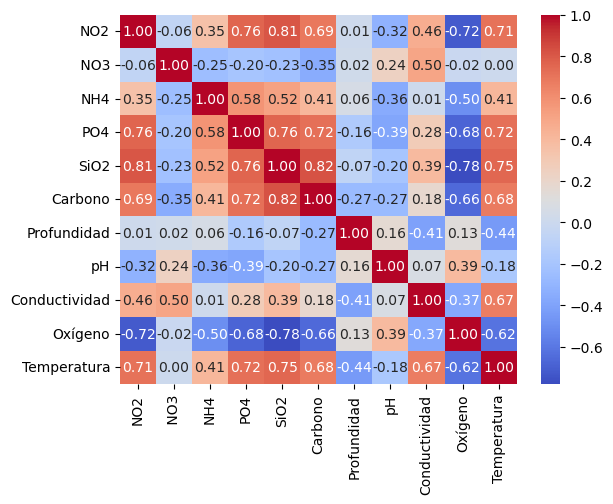

In [9]:
corr_matrix_rounded = np.round(corr_matrix, 2)

sns.heatmap(corr_matrix_rounded, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [10]:
# Sacar la profundiad de la columna
profundidad = datos['Profundidad']
datos = datos.drop(columns=['Profundidad'])

In [11]:
# Sacar pH de la columna
Ph = datos['pH']
datos = datos.drop(columns=['pH'])

In [12]:
# Análisis de componentes principales (PCA)
# Escalar los datos
scaler = StandardScaler()
datos_scaled = scaler.fit_transform(datos)

In [13]:
# Calcular el PCA
pca = PCA()
res_pca = pca.fit_transform(datos_scaled)

In [14]:
# Obtener tablas de componentes principales y eigenvalores
eigenvalues = pca.explained_variance_
percentages = pca.explained_variance_ratio_
acumulados = np.cumsum(percentages)

df = pd.DataFrame({'Eigenvalues': eigenvalues, 'Explained variance': percentages, 'Cumulative explained variance': acumulados})
print(df)

   Eigenvalues  Explained variance  Cumulative explained variance
0     5.103232            0.547473                       0.547473
1     1.526893            0.163805                       0.711278
2     1.150010            0.123373                       0.834650
3     0.503694            0.054036                       0.888687
4     0.400381            0.042953                       0.931639
5     0.306634            0.032896                       0.964535
6     0.201603            0.021628                       0.986163
7     0.095662            0.010263                       0.996426
8     0.033319            0.003574                       1.000000


In [15]:
# Obtener las cargas factoriales
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(len(percentages))], index=datos.columns)
print(loadings_df)

                    PC1       PC2       PC3       PC4       PC5       PC6  \
NO2            0.846749  0.126136 -0.350351  0.065372 -0.207210  0.249331   
 NO3          -0.040495  0.860577  0.459073 -0.135972 -0.105427 -0.129967   
NH4            0.507152 -0.444078  0.593341  0.454296  0.000895 -0.095883   
PO4            0.714552 -0.043316  0.544163 -0.267432  0.216478  0.319755   
SiO2           0.945104 -0.022281 -0.278429  0.090102 -0.001851  0.063180   
Carbono        0.829846 -0.349771 -0.104938 -0.329601 -0.029600 -0.290482   
Conductividad  0.615100  0.658609 -0.198136  0.279128  0.257197 -0.070106   
Oxígeno       -0.865361 -0.120410 -0.189087 -0.004087  0.411123  0.037162   
Temperatura    0.952763 -0.014469 -0.069300 -0.091344  0.251823 -0.146535   

                    PC7       PC8       PC9  
NO2            0.244572 -0.100974 -0.026205  
 NO3           0.181215  0.052110  0.026175  
NH4            0.113980 -0.022981  0.012417  
PO4           -0.069795 -0.035553  0.019475  

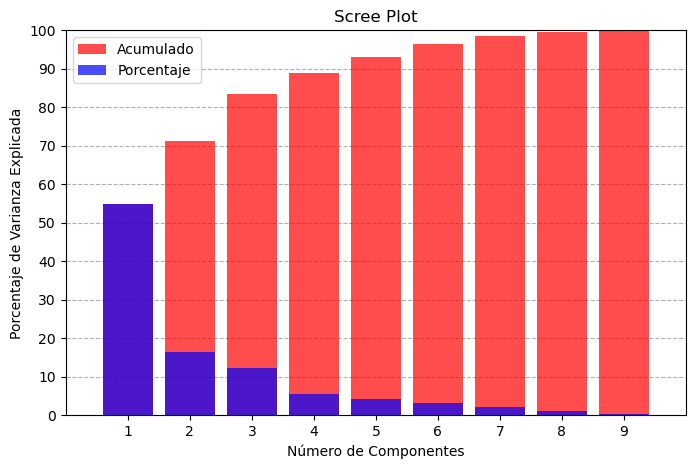

In [42]:
# Gráfico de Scree Plot
plt.figure(figsize=(8, 5))
plt.bar(np.arange(1, len(percentages) + 1), acumulados * 100, color="red", zorder=2, alpha=0.7, label='Acumulado')
plt.bar(np.arange(1, len(percentages) + 1), percentages * 100, color="blue", zorder=3, alpha=0.7, label='Porcentaje')
plt.title('Scree Plot')
plt.xlabel('Número de Componentes')
plt.ylabel('Porcentaje de Varianza Explicada')
plt.xlim(0, len(percentages) + 1)
plt.ylim(0, 100)
plt.xticks(np.arange(1, len(percentages) + 1))
plt.yticks(np.arange(0, 101, 10))
plt.grid(axis='y', linestyle='--', zorder=0)
plt.legend()
plt.show()

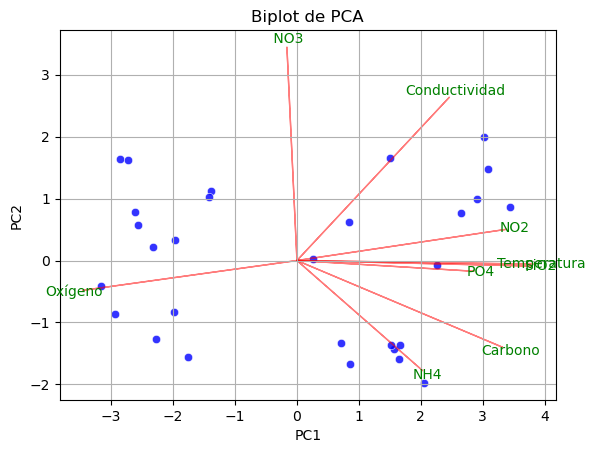

In [38]:
# Biplot de PCA
sns.scatterplot(x=res_pca[:, 0], y=res_pca[:, 1], alpha=0.8, color='b')
for i, columna in enumerate(datos.columns):
    plt.arrow(0, 0, 4*loadings[i, 0], 4*loadings[i, 1], color='r', alpha=0.5)
    plt.text(loadings[i, 0]*4.15, loadings[i, 1]*4.15, columna, color='g', ha='center', va='center')
plt.grid()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biplot de PCA')
plt.show()